In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [36]:
df = pd.read_csv('./random_classified_data.csv', sep=',', index_col=0)
print("Số chiều của bộ dữ liệu: ", df.shape)

Số chiều của bộ dữ liệu:  (1000, 11)


In [37]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

def scale_columns(df, cols):
    for col in cols:
        df[col] = pd.DataFrame(ss.fit_transform(pd.DataFrame(df[col])), columns=[col])
    return df

df_scaled = scale_columns(df, df.columns[:-1])
arr = df_scaled.to_numpy()

In [39]:
arr_train = {
    'data': arr[:700, :-1],
    'target': arr[:700, -1]
}

arr_test = {
    'data': arr[700:, :-1],
    'target': arr[700:, -1]
}

In [40]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(arr_train['data'], arr_train['target'])
y_pred = knn_clf.predict(arr_test['data'])

print("Print results for 25 test data samples in test:")
print("Predicted labels: ", y_pred[:25])
print("Ground truth:     ", arr_test["target"][:25])

Print results for 25 test data samples in test:
Predicted labels:  [0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1.]
Ground truth:      [0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0.]


In [41]:
print(f'Using 1 neighbor, accuracy score: {round(100 * accuracy_score(arr_test["target"], y_pred), ndigits=2)}%')
print("Confusion Matrix:\n", confusion_matrix(arr_test["target"], y_pred))

Using 1 neighbor, accuracy score: 93.67%
Confusion Matrix:
 [[130  12]
 [  7 151]]


In [42]:
print("Confusion Matrix:\n", confusion_matrix(arr_test["target"], y_pred))

Confusion Matrix:
 [[130  12]
 [  7 151]]


In [43]:
error_rate_list = []
for quantity in range(1, 51):
    knn_clf = KNeighborsClassifier(n_neighbors = quantity)
    knn_clf.fit(arr_train["data"], arr_train["target"])
    y_pred = knn_clf.predict(arr_test["data"])
    error_rate_list.append(np.mean(y_pred != arr_test["target"]))


Text(0.5, 0, 'Number of Neighbors used in KNeighborsClassifier')

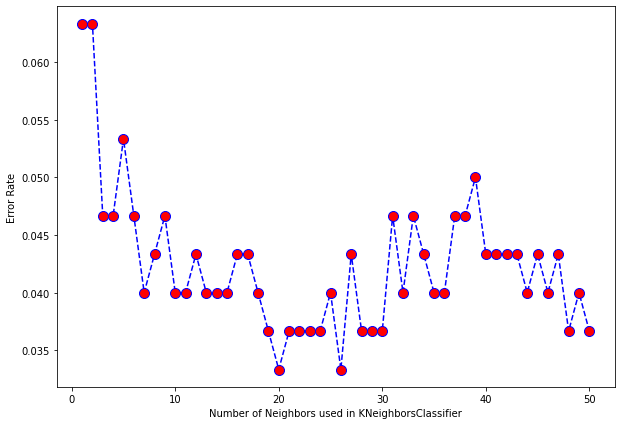

In [44]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 51), error_rate_list, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.ylabel("Error Rate")
plt.xlabel("Number of Neighbors used in KNeighborsClassifier")

In [45]:
knn_clf = KNeighborsClassifier(n_neighbors=20)
knn_clf.fit(arr_train['data'], arr_train['target'])
y_pred = knn_clf.predict(arr_test['data'])

print("Print results for 25 test data samples in test:")
print("Predicted labels: ", y_pred[:25])
print("Ground truth:     ", arr_test["target"][:25])

Print results for 25 test data samples in test:
Predicted labels:  [0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0.]
Ground truth:      [0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0.]


In [46]:
print(f'Using 20 neighbors, accuracy score: {round(100 * accuracy_score(arr_test["target"], y_pred), ndigits=2)}%')
print("Confusion Matrix:\n", confusion_matrix(arr_test["target"], y_pred))

Using 20 neighbors, accuracy score: 96.67%
Confusion Matrix:
 [[135   7]
 [  3 155]]


In [47]:
knn_clf = KNeighborsClassifier(n_neighbors=20, weights="distance")
knn_clf.fit(arr_train['data'], arr_train['target'])
y_pred = knn_clf.predict(arr_test['data'])

print("Print results for 25 test data samples in test:")
print("Predicted labels: ", y_pred[:25])
print("Ground truth:     ", arr_test["target"][:25])

Print results for 25 test data samples in test:
Predicted labels:  [0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0.]
Ground truth:      [0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0.]


In [48]:
print(f'Using 20 neighbors and distance for weight, accuracy score: {round(100 * accuracy_score(arr_test["target"], y_pred), ndigits=2)}%')

Using 20 neighbors and distance for weight, accuracy score: 96.67%


In [49]:
def custome_weight(distances):
    sigma2=.5
    return np.exp(-distances**2/sigma2)

knn_clf = KNeighborsClassifier(n_neighbors=20, weights=custome_weight)
knn_clf.fit(arr_train['data'], arr_train['target'])
y_pred = knn_clf.predict(arr_test['data'])

print("Print results for 25 test data samples in test:")
print("Predicted labels: ", y_pred[:25])
print("Ground truth:     ", arr_test["target"][:25])

Print results for 25 test data samples in test:
Predicted labels:  [0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1.]
Ground truth:      [0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0.]


In [50]:
print(f'Using 20 neighbors and self customizing weight, accuracy score: {round(100 * accuracy_score(arr_test["target"], y_pred), ndigits=2)}%')

Using 20 neighbors and self customizing weight, accuracy score: 93.67%
